In [1]:
import ipympl
%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
#from causalgraphicalmodels import CausalGraphicalModel
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# Modelo IS-LM con Tasa de Interés Exógena $(r)$ fijada por el Banco Central:

## Ecuaciones

- Ecuación de la IS: 

Partiendo de:

$$ Y = C + I + G + X - M $$

donde

$$ C = C_0 + b(1-t)Y $$

$$ I = I_0 - hr $$

$$ G = G_0 $$

$$ X = X_0 $$

$$ M = mY $$

Reemplazando:

$$ Y = C_0 + b(1-t)Y + I_0 - hr + G_0 + X_0 - mY $$

La ecuación de la IS es en función de $Y$ es:

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_o + I_o + G_o + X_o - hr) $$

o,

$$ Y = \frac{1}{B_1} (B_0) $$

Donde $ B_0 = C_o + I_o + G_o + X_o - hr $ y $ B_1 = 1 - (b - m)(1 - t) $

- Ecuación de la LM:

$$ \frac{M_o^s}{P_0} = kY - jr $$

Ahora $M^s$ es la variable endogena, por eso escribimos la LM En función de $(M^s)$:

$$ M^s = P_0(kY - jr) $$

## Equilibrio IS-LM con $r$ exógena

- Ingreso de equilibrio: es igual a la ecuación de la IS

$$ Y^e = \frac{1}{1 - (b - m)(1 - t)} (C_o + I_o + G_o + X_o - hr) $$

- Masa monetaria: reemplazamos $Y$ en $M_s$:

$$ M^e_s = P_0(kY - jr) $$

$$ M^e_s = (\frac{B_0}{B_1})P_0k - P_0jr $$


$$ M^e_s = P_0k(\frac{1}{1 - (b - m)(1 - t)} (C_o + I_o + G_o + X_o - hr)) - P_0jr $$

## Curva IS

In [2]:
#--------------------------------------------------

# Curva IS

r_size = 100 

Co = 13
b = 0.7
t = 0.25
Io = 6.4
Go = 5
h = 0.3
Xo = 2
m = 0.4

r = np.arange(r_size)

# Ecuación

def IS_CB(Co, b, t, Io, h, Xo, m, Go):
    IS_CB = (1/(1 - (b - m)*(1 - t)))*(Co + Io + Go + Xo - h*r)
    return IS_CB

IS_CB = IS_CB(Co, b, t, Io, h, Xo, m, Go)

## Curva LM

In [3]:
#--------------------------------------------------
# Curva LM
    
# Parámetros

Y_size = 100

P = 3.5
k = 1.76
j = 3
r = 15

Y = np.arange(Y_size)

# Ecuación

def LM_CB(Y, P, k, j, r):
    LM_CB = P*(k*Y - j*r)
    return LM_CB

LM_CB = LM_CB(Y, P, k, j, r)

## Funcion para encontrar el cruce de rectas

In [4]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y


### Encontrar puntos de cruce

In [5]:
r_ec = np.full((100), 15)

# coordenadas de las curvas (x,y)
A = [IS_CB[0], Y[0]] # DA, coordenada inicio
B = [IS_CB[-1], Y[-1]] # DA, coordenada fin

C = [r_ec[0], Y[0]] # L_45, coordenada inicio
D = [r_ec[-1], Y[-1]] # L_45, coordenada fin

# creación de intersección

intersec_1 = line_intersection((A, B), (C, D))
intersec_1 # (y,x)

(15.000000000000002, 49.25)

## Gráfico del modelo IS-LM-PM

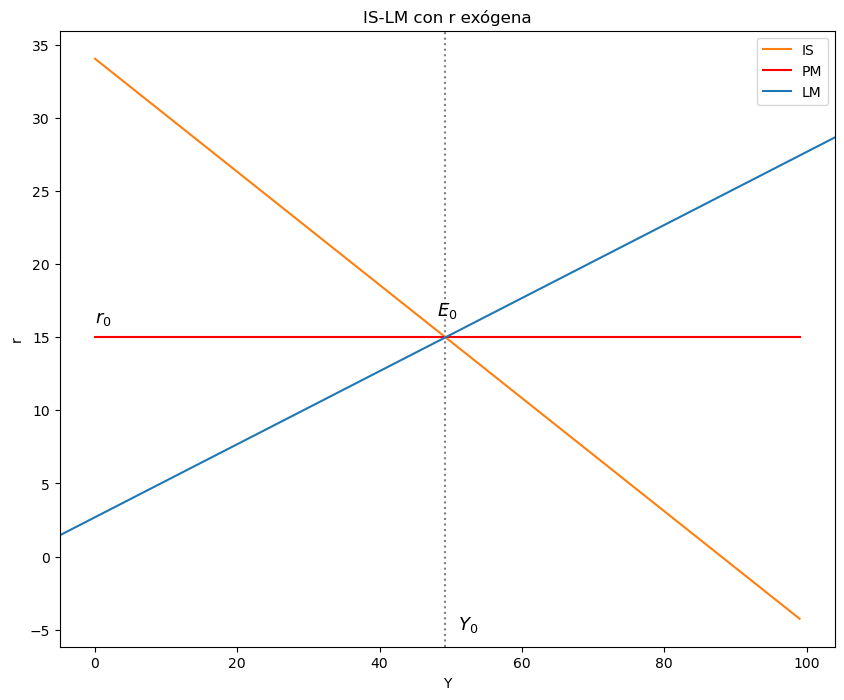

In [6]:
# Gráfico del modelo IS-PM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(IS_CB, label = "IS", color = "C1") #IS
ax.plot(r_ec, color = "red", label ="PM") #r: tasa de interés

plt.axvline(intersec_1[1], ymin= 0, ymax= 1, linestyle = ":", color = "grey")
plt.axline((intersec_1[1], intersec_1[0]), slope=0.25, color="C0", label = 'LM')

#ax.yaxis.set_major_locator(plt.NullLocator())   
#ax.xaxis.set_major_locator(plt.NullLocator())

ax.text(0, 16, '$r_0$', fontsize = 13, color = 'black')
ax.text(51, -5, '$Y_0$', fontsize = 13, color = 'black')
ax.text(48, 16.5, '$E_0$', fontsize = 13, color = 'black')

ax.set(title="IS-LM con r exógena", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()


## Estática comparativa

In [7]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, b, m, t, P, k, j, r, beta_0, beta_1 = symbols('Co, Io, Go, Xo, h, b, m, t, P, k, j, r, beta_0, beta_1')

# # Beta_0 y beta_1
# beta_0 = (Co + Io + Go + Xo - h*r)
# beta_1 = (1-(b-m)*(1-t))

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (Co + Io + Go + Xo - h*r/(1-(b-m)*(1-t)))
Ms_eq = (Co + Io + Go + Xo - h*r/(1-(b-m)*(1-t)))*(P*k) - (P*j*r)

### Incremento tasa de interés $(r)$

- Matemática:

In [10]:
df_Y_eq_r = diff(Y_eq, r)
print("El Diferencial del Producto con respecto al diferencial de la tasa de interés = ", df_Y_eq_r)

El Diferencial del Producto con respecto al diferencial de la tasa de interés =  -h/(-(1 - t)*(b - m) + 1)


¿$∆Y$ sabiendo que $∆r > 0$?

$$ \frac{∆Y}{∆r} = (-) $$

$$ \frac{∆Y}{(+)} = (-) $$

$$ ∆Y = (-) $$



In [11]:
df_Ms_eq_r = diff(Ms_eq, r)
print("El Diferencial de la Masa Monetaria con respecto al diferencial de la tasa de interés = ", df_Ms_eq_r)

El Diferencial de la Masa Monetaria con respecto al diferencial de la tasa de interés =  -P*h*k/(-(1 - t)*(b - m) + 1) - P*j


¿$∆M^s$ sabiendo que $∆r > 0$?

$$ \frac{∆M^s}{∆r} = (-) $$

$$ \frac{∆M^s}{(+)} = (-) $$

$$ ∆M^s = (-) $$



- Intuición:

$$ r↑ → I↓ → DA↓ → DA < Y → Y↓ $$

$$ r↑ → M^d<M^s → M^s↓ $$


- Gráfico:

In [15]:
#--------------------------------------------------
    # Curva IS

r_size = 100 

Co = 13
b = 0.7
t = 0.25
Io = 6.4
Go = 5
h = 0.3
Xo = 2
m = 0.4

r = np.arange(r_size)

# Ecuación

def IS_CB(Co, b, t, Io, h, Xo, m, Go):
    IS_CB = (1/(1 - (b - m)*(1 - t)))*(Co + Io + Go + Xo - h*r)
    return IS_CB

IS_CB = IS_CB(Co, b, t, Io, h, Xo, m, Go)


#--------------------------------------------------
    # Curva LM
    
# Parámetros

Y_size = 100

P = 3.5
k = 1.76
j = 3
r = 15

Y = np.arange(Y_size)

# Ecuación

def LM_CB(Y, P, k, j, r):
    LM_CB = P*(k*Y - j*r)
    return LM_CB

LM_CB = LM_CB(Y, P, k, j, r)

#---------------------------------------------------
    # Nueva LM

r = 20 

def LM_CB_2(Y, P, k, j, r):
    LM_CB_2 = P*(k*Y - j*r)
    return LM_CB_2

LM_CB_2 = LM_CB_2(Y, P, k, j, r)

In [17]:
LM_CB_2

array([-210.  , -203.84, -197.68, -191.52, -185.36, -179.2 , -173.04,
       -166.88, -160.72, -154.56, -148.4 , -142.24, -136.08, -129.92,
       -123.76, -117.6 , -111.44, -105.28,  -99.12,  -92.96,  -86.8 ,
        -80.64,  -74.48,  -68.32,  -62.16,  -56.  ,  -49.84,  -43.68,
        -37.52,  -31.36,  -25.2 ,  -19.04,  -12.88,   -6.72,   -0.56,
          5.6 ,   11.76,   17.92,   24.08,   30.24,   36.4 ,   42.56,
         48.72,   54.88,   61.04,   67.2 ,   73.36,   79.52,   85.68,
         91.84,   98.  ,  104.16,  110.32,  116.48,  122.64,  128.8 ,
        134.96,  141.12,  147.28,  153.44,  159.6 ,  165.76,  171.92,
        178.08,  184.24,  190.4 ,  196.56,  202.72,  208.88,  215.04,
        221.2 ,  227.36,  233.52,  239.68,  245.84,  252.  ,  258.16,
        264.32,  270.48,  276.64,  282.8 ,  288.96,  295.12,  301.28,
        307.44,  313.6 ,  319.76,  325.92,  332.08,  338.24,  344.4 ,
        350.56,  356.72,  362.88,  369.04,  375.2 ,  381.36,  387.52,
        393.68,  399

In [19]:
r_size = 100 

Co = 13
b = 0.7
t = 0.25
Io = 6.4
Go = 5
h = 0.3
Xo = 2
m = 0.4

r = np.arange(r_size)
def M_CB(Co, b, t, Io, h, Xo, m, Go, P, k, j, r ):
    M_CB = P*k*(1/(1 - (b - m)*(1 - t)))*(Co + Io + Go + Xo - h*r) - P*j*r
    return M_CB

M_CB = M_CB(Co, b, t, Io, h, Xo, m, Go, P, k, j, r )

In [20]:
M_CB

array([  209.83741935,   196.95290323,   184.0683871 ,   171.18387097,
         158.29935484,   145.41483871,   132.53032258,   119.64580645,
         106.76129032,    93.87677419,    80.99225806,    68.10774194,
          55.22322581,    42.33870968,    29.45419355,    16.56967742,
           3.68516129,    -9.19935484,   -22.08387097,   -34.9683871 ,
         -47.85290323,   -60.73741935,   -73.62193548,   -86.50645161,
         -99.39096774,  -112.27548387,  -125.16      ,  -138.04451613,
        -150.92903226,  -163.81354839,  -176.69806452,  -189.58258065,
        -202.46709677,  -215.3516129 ,  -228.23612903,  -241.12064516,
        -254.00516129,  -266.88967742,  -279.77419355,  -292.65870968,
        -305.54322581,  -318.42774194,  -331.31225806,  -344.19677419,
        -357.08129032,  -369.96580645,  -382.85032258,  -395.73483871,
        -408.61935484,  -421.50387097,  -434.3883871 ,  -447.27290323,
        -460.15741935,  -473.04193548,  -485.92645161,  -498.81096774,
      

In [21]:
 # coordenadas de las curvas (x,y)
A = [M_CB[0], Y[0]] # DA, coordenada inicio
B = [M_CB[-1], Y[-1]] # DA, coordenada fin

C = [IS_CB[0], Y[0]] # L_45, coordenada inicio
D = [IS_CB[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

Ajuste = line_intersection((A, B), (C, D))
Ajuste # (y,x)

(28.620102214650764, 14.064735945485518)

In [22]:
 # coordenadas de las curvas (x,y)
A = [M_CB[0], Y[0]] # DA, coordenada inicio
B = [M_CB[-1], Y[-1]] # DA, coordenada fin

C = [r_ec[0], Y[0]] # L_45, coordenada inicio
D = [r_ec[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

Ajuste = line_intersection((A, B), (C, D))
Ajuste # (y,x)

(15.0, 15.121826648640527)

In [ ]:
 # coordenadas de las curvas (x,y)
A = [M_CB[0], Y[0]] # DA, coordenada inicio
B = [M_CB[-1], Y[-1]] # DA, coordenada fin

C = [r_ec[0], Y[0]] # L_45, coordenada inicio
D = [r_ec[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

Ajuste = line_intersection((A, B), (C, D))
Ajuste # (y,x)

In [40]:
 # coordenadas de las curvas (x,y)
A = [IS_CB[0], Y[0]] # DA, coordenada inicio
B = [IS_CB[-1], Y[-1]] # DA, coordenada fin

C = [M_CB[0], Y[0]] # L_45, coordenada inicio
D = [M_CB[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

Ajuste = line_intersection((A, B), (C, D))
Ajuste # (y,x)

(28.620102214650764, 14.064735945485518)

In [9]:
r_ec = np.full((100), 15)

    # coordenadas de las curvas (x,y)
A = [IS_CB[0], Y[0]] # DA, coordenada inicio
B = [IS_CB[-1], Y[-1]] # DA, coordenada fin

C = [r_ec[0], Y[0]] # L_45, coordenada inicio
D = [r_ec[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec_1 = line_intersection((A, B), (C, D))
intersec_1 # (y,x)

(15.000000000000002, 49.25)

In [10]:
r_ec_2 = np.full((100), 20)

    # coordenadas de las curvas (x,y)
A = [IS_CB[0], Y[0]] # DA, coordenada inicio
B = [IS_CB[-1], Y[-1]] # DA, coordenada fin

C = [r_ec_2[0], Y[0]] # L_45, coordenada inicio
D = [r_ec_2[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec_2 = line_intersection((A, B), (C, D))
intersec_2 # (y,x)

(20.0, 36.333333333333336)

In [ ]:
    # coordenadas de las curvas (x,y)
A = [IS_CB[0], Y[0]] # DA, coordenada inicio
B = [IS_CB[-1], Y[-1]] # DA, coordenada fin

C = [r_ec_2[0], Y[0]] # L_45, coordenada inicio
D = [r_ec_2[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec_2 = line_intersection((A, B), (C, D))
intersec_2 # (y,x)

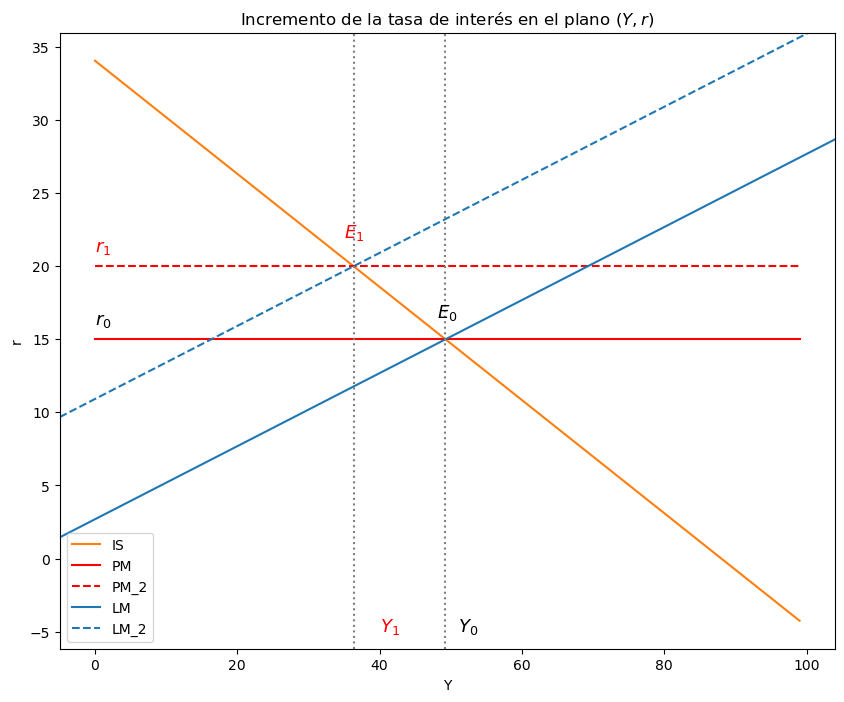

In [13]:
# Gráfico del modelo IS-PM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(IS_CB, label = "IS", color = "C1") #IS
ax.plot(r_ec, color = "red", label ="PM") #r: tasa de interés
ax.plot(r_ec_2, color = "red", label ="PM_2", linestyle = 'dashed') #r: tasa de interés

plt.axline((intersec_1[1], intersec_1[0]), slope=0.25, color="C0", label = 'LM')
plt.axline((intersec_2[1], intersec_2[0]), slope=0.25, color="C0", label = 'LM_2', linestyle = 'dashed')

plt.axvline(x=intersec_1[1], ymin= 0, ymax= 1, linestyle = ":", color = "grey")
plt.axvline(x=intersec_2[1], ymin= 0, ymax= 1, linestyle = ":", color = "grey")

ax.text(0, 16, '$r_0$', fontsize = 13, color = 'black')
ax.text(51, -5, '$Y_0$', fontsize = 13, color = 'black')
ax.text(48, 16.5, '$E_0$', fontsize = 13, color = 'black')

ax.text(0, 21, '$r_1$', fontsize = 13, color = 'red')
ax.text(40, -5, '$Y_1$', fontsize = 13, color = 'red')
ax.text(35, 22, '$E_1$', fontsize = 13, color = 'red')

ax.set(title="Incremento de la tasa de interés en el plano $(Y, r)$", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()


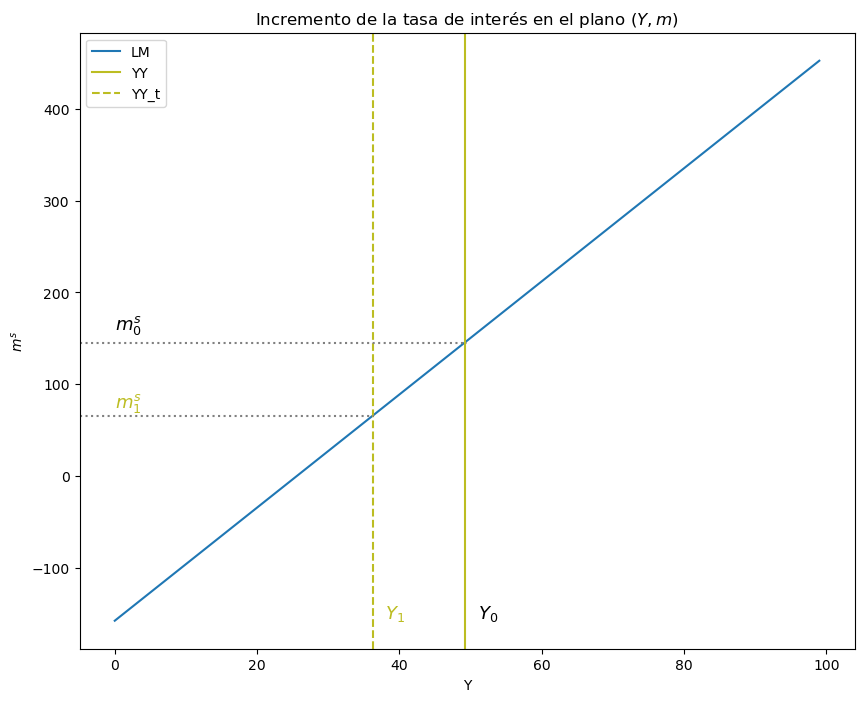

In [21]:
# Gráfico del modelo IS-PM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(LM_CB, label = "LM", color = "C0") #LM
plt.axvline(x=intersec_1[1], ymin= 0, ymax= 1, color = "C8", label = 'YY')
plt.axvline(x=intersec_2[1], ymin= 0, ymax= 1, color = "C8", label = 'YY_t', linestyle = 'dashed')

plt.axhline(y=145, xmin= 0, xmax= 0.5, color = "grey", linestyle = ':')
plt.axhline(y=65, xmin= 0, xmax= 0.38, color = "grey", linestyle = ':')

ax.text(0, 160, '$m_0^s$', fontsize = 13, color = 'black')
ax.text(51, -155, '$Y_0$', fontsize = 13, color = 'black')

ax.text(0, 75, '$m_1^s$', fontsize = 13, color = 'C8')
ax.text(38, -155, '$Y_1$', fontsize = 13, color = 'C8')

#ax.yaxis.set_major_locator(plt.NullLocator())   
#ax.xaxis.set_major_locator(plt.NullLocator())

ax.set(title="Incremento de la tasa de interés en el plano $(Y, m)$", xlabel= 'Y', ylabel= '$m^s$')
ax.legend()

plt.show()

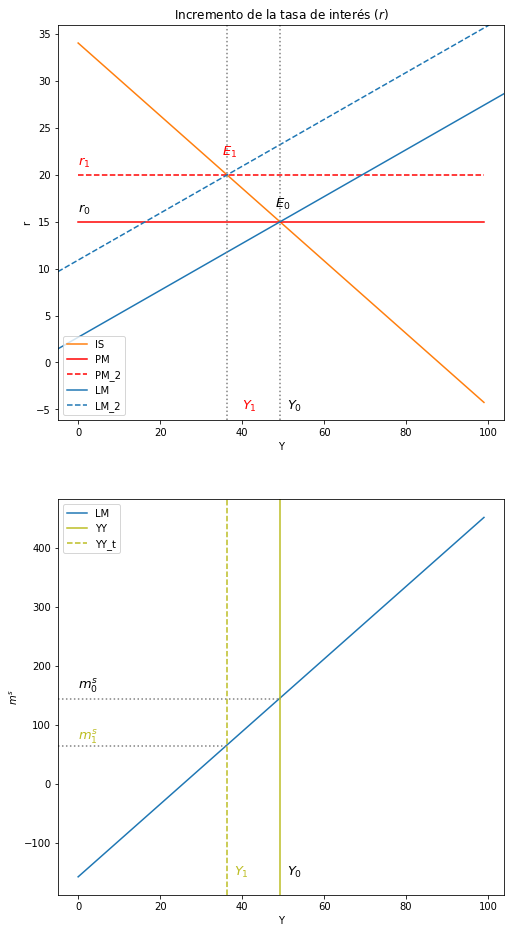

In [15]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # IS_PM

# Curvas a graficar
ax1.plot(IS_CB, label = "IS", color = "C1") #IS
ax1.plot(r_ec, color = "red", label ="PM") #r: tasa de interés
ax1.plot(r_ec_2, color = "red", label ="PM_2", linestyle = 'dashed') #r: tasa de interés

ax1.axline((intersec_1[1], intersec_1[0]), slope=0.25, color="C0", label = 'LM')
ax1.axline((intersec_2[1], intersec_2[0]), slope=0.25, color="C0", label = 'LM_2', linestyle = 'dashed')

ax1.axvline(x=intersec_1[1], ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axvline(x=intersec_2[1], ymin= 0, ymax= 1, linestyle = ":", color = "grey")

ax1.text(0, 16, '$r_0$', fontsize = 13, color = 'black')
ax1.text(51, -5, '$Y_0$', fontsize = 13, color = 'black')
ax1.text(48, 16.5, '$E_0$', fontsize = 13, color = 'black')

ax1.text(0, 21, '$r_1$', fontsize = 13, color = 'red')
ax1.text(40, -5, '$Y_1$', fontsize = 13, color = 'red')
ax1.text(35, 22, '$E_1$', fontsize = 13, color = 'red')

ax1.set(title="Incremento de la tasa de interés $(r)$", xlabel= 'Y', ylabel= 'r')
ax1.legend()


#---------------------------------
    # YY-MM
    
ax2.plot(LM_CB, label = "LM", color = "C0") #LM
ax2.axvline(x=intersec_1[1], ymin= 0, ymax= 1, color = "C8", label = 'YY')
ax2.axvline(x=intersec_2[1], ymin= 0, ymax= 1, color = "C8", label = 'YY_t', linestyle = 'dashed')

ax2.axhline(y=145, xmin= 0, xmax= 0.5, color = "grey", linestyle = ':')
ax2.axhline(y=65, xmin= 0, xmax= 0.38, color = "grey", linestyle = ':')

ax2.text(0, 160, '$m_0^s$', fontsize = 13, color = 'black')
ax2.text(51, -155, '$Y_0$', fontsize = 13, color = 'black')

ax2.text(0, 75, '$m_1^s$', fontsize = 13, color = 'C8')
ax2.text(38, -155, '$Y_1$', fontsize = 13, color = 'C8')

ax2.set(xlabel= 'Y', ylabel= '$m^s$')
ax2.legend()

plt.show()


In [16]:
#--------------------------------------------------
    # Curva LM
    
# Parámetros

Y_size = 100

P = 3.5
k = 1.76
j = 3
r = 15

Y = np.arange(Y_size)

# Ecuación

def LM_CB(Y, P, k, j, r):
    LM_CB = P*(k*Y - j*r)
    return LM_CB

LM_CB = LM_CB(Y, P, k, j, r)

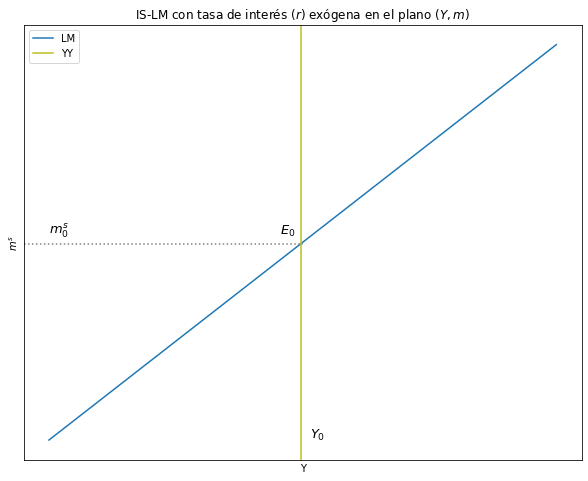

In [17]:
# Gráfico del modelo IS-PM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(LM_CB, label = "LM", color = "C0") #IS
plt.axvline(x=intersec_1[1], ymin= 0, ymax= 1, color = "C8", label = 'YY')

plt.axhline(y=145, xmin= 0, xmax= 0.5, color = "grey", linestyle = ':')

ax.text(0, 160, '$m_0^s$', fontsize = 13, color = 'black')
ax.text(51, -155, '$Y_0$', fontsize = 13, color = 'black')
ax.text(45, 160, '$E_0$', fontsize = 13, color = 'black')

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

ax.set(title="IS-LM con tasa de interés $(r)$ exógena en el plano $(Y, m)$", xlabel= 'Y', ylabel= '$m^s$')
ax.legend()

plt.show()


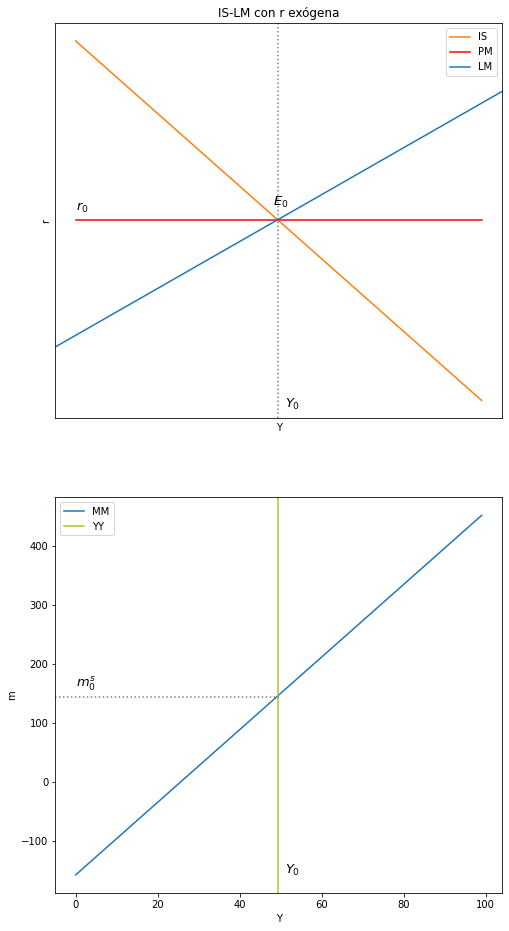

In [18]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # IS_PM

# Curvas a graficar
ax1.plot(IS_CB, label = "IS", color = "C1") #IS
ax1.plot(r_ec, color = "red", label ="PM") #r: tasa de interés

ax1.axvline(intersec_1[1], ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axline((intersec_1[1], intersec_1[0]), slope=0.25, color="C0", label = 'LM')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.text(0, 16, '$r_0$', fontsize = 13, color = 'black')
ax1.text(51, -5, '$Y_0$', fontsize = 13, color = 'black')
ax1.text(48, 16.5, '$E_0$', fontsize = 13, color = 'black')

ax1.set(title="IS-LM con r exógena", xlabel= 'Y', ylabel= 'r')
ax1.legend()


#---------------------------------
    # YY-MM
    
ax2.plot(LM_CB, label = "MM", color = "C0") #IS
ax2.axvline(x=intersec_1[1], ymin= 0, ymax= 1, color = "C8", label = 'YY')

ax2.axhline(y=145, xmin= 0, xmax= 0.5, color = "grey", linestyle = ':')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax2.text(0, 160, '$m_0^s$', fontsize = 13, color = 'black')
ax2.text(51, -155, '$Y_0$', fontsize = 13, color = 'black')

ax2.set(xlabel= 'Y', ylabel= 'm')
ax2.legend()

plt.show()


In [19]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, b, m, t, P, k, j, r, beta_0, beta_1 = symbols('Co, Io, Go, Xo, h, b, m, t, P, k, j, r, beta_0, beta_1')

# # Beta_0 y beta_1
# beta_0 = (Co + Io + Go + Xo - h*r)
# beta_1 = (1-(b-m)*(1-t))

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (Co + Io + Go + Xo - h*r/(1-(b-m)*(1-t)))
Ms_eq = (Co + Io + Go + Xo - h*r/(1-(b-m)*(1-t)))*(P*k) - (P*j*r)